In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import multivariate_normal as norm
import scipy.io
from skimage import img_as_float

# Hello Soft Clustering (GMM)

### T1. EM steps for 3 gaussian mixtures

In [2]:
points = np.array([(1,2), (3,3), (2,2), (8,8), (6,6), (7,7), (-3,-3), (-2,-4), (-7,-7)])
n_points = len(points)

In [3]:
n_gaussian = 3
means = np.array([(3,3), (2,2), (-3,-3)])
covs = [np.identity(2)] * n_gaussian
weights = np.array([1/n_gaussian] * n_gaussian)
probs = np.zeros((n_points, n_gaussian))

for i in range (3):
    for n in range (n_points):
        for j in range (n_gaussian):
            probs[n, j] = norm.pdf(points[n], mean=means[j], cov=covs[j]) * weights[j]
        probs[n, :] = probs[n, :] / sum(probs[n, :])
    
    weights = sum(probs) / n_points
    means = (points.T.dot(probs) / sum(probs)).T
    for j in range (n_gaussian):
        covs[j] = np.zeros((2,2))
        for n in range (n_points):
            covs[j] += probs[n, j] * np.identity(2) * ((points[n] - means[j]) ** 2)
        covs[j] /= sum(probs[:, j])  
    
    print("Iteration ", i+1)
    print("Probabilities")
    print(probs)
    print("Weights")
    print(weights)
    print("Means")
    print(means)
    print("Covariances")
    [print(cov) for cov in covs]
    print("-" * 50)

Iteration  1
Probabilities
[[1.19202922e-01 8.80797076e-01 1.81545808e-09]
 [7.31058579e-01 2.68941421e-01 1.69570706e-16]
 [2.68941421e-01 7.31058579e-01 1.01529005e-11]
 [9.99983299e-01 1.67014218e-05 2.03105874e-42]
 [9.99088949e-01 9.11051194e-04 5.37528453e-32]
 [9.99876605e-01 1.23394576e-04 3.30529272e-37]
 [2.31952283e-16 1.38879439e-11 1.00000000e+00]
 [2.31952283e-16 1.38879439e-11 1.00000000e+00]
 [3.30570063e-37 5.90009054e-29 1.00000000e+00]]
Weights
[0.45757242 0.20909425 0.33333333]
Means
[[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
Covariances
[[4.53619412 0.        ]
 [0.         4.28700611]]
[[0.51645579 0.        ]
 [0.         0.13152618]]
[[4.66666668 0.        ]
 [0.         2.88888891]]
--------------------------------------------------
Iteration  2
Probabilities
[[3.16932821e-003 9.96824702e-001 5.96935641e-006]
 [6.55101207e-001 3.44898109e-001 6.84250685e-007]
 [5.77503537e-003 9.94223665e-001 1.30002282e-006]
 [1.00000000e

### T2. Plot the log likelihood of the model using 3 mixtures

In [4]:
n_gaussian = 3
means = np.array([(3,3), (2,2), (-3,-3)])
covs = [np.identity(2)] * n_gaussian
weights = np.array([1/n_gaussian] * n_gaussian)
probs = np.zeros((n_points, n_gaussian))
log_llh = []

for i in range (6):
    for n in range (n_points):
        for j in range (n_gaussian):
            probs[n, j] = norm.pdf(points[n], mean=means[j], cov=covs[j]) * weights[j]
        probs[n, :] = probs[n, :] / sum(probs[n, :])
    
    log_llh.append(np.sum(np.log(sum(probs))))
    
    weights = sum(probs) / n_points
    means = (points.T.dot(probs) / sum(probs)).T
    for j in range (n_gaussian):
        covs[j] = np.zeros((2,2))
        for n in range (n_points):
            covs[j] += probs[n, j] * np.identity(2) * ((points[n] - means[j]) ** 2)
        covs[j] /= sum(probs[:, j])

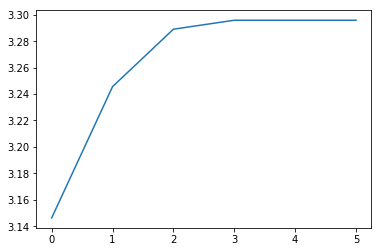

In [5]:
plt.plot(log_llh)
plt.show()

### T3. EM steps for 2 gaussian mixtures

In [6]:
n_gaussian = 2
means = np.array([(3,3), (-3,-3)])
covs = [np.identity(2)] * n_gaussian
weights = np.array([1/n_gaussian] * n_gaussian)
probs = np.zeros((n_points, n_gaussian))

for i in range (3):
    for n in range (n_points):
        for j in range (n_gaussian):
            probs[n, j] = norm.pdf(points[n], mean=means[j], cov=covs[j]) * weights[j]
        probs[n, :] = probs[n, :] / sum(probs[n, :])
    
    weights = sum(probs) / n_points
    means = (points.T.dot(probs) / sum(probs)).T
    for j in range (n_gaussian):
        covs[j] = np.zeros((2,2))
        for n in range (n_points):
            covs[j] += probs[n, j] * np.identity(2) * ((points[n] - means[j]) ** 2)
        covs[j] /= sum(probs[:, j])  
    
    print("Iteration ", i+1)
    print("Probabilities")
    print(probs)
    print("Weights")
    print(weights)
    print("Means")
    print(means)
    print("Covariances")
    [print(cov) for cov in covs]
    print("-" * 50)

Iteration  1
Probabilities
[[9.99999985e-01 1.52299795e-08]
 [1.00000000e+00 2.31952283e-16]
 [1.00000000e+00 3.77513454e-11]
 [1.00000000e+00 2.03109266e-42]
 [1.00000000e+00 5.38018616e-32]
 [1.00000000e+00 3.30570063e-37]
 [2.31952283e-16 1.00000000e+00]
 [2.31952283e-16 1.00000000e+00]
 [3.30570063e-37 1.00000000e+00]]
Weights
[0.66666666 0.33333334]
Means
[[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
Covariances
[[6.91666665 0.        ]
 [0.         5.88888889]]
[[4.66666677 0.        ]
 [0.         2.8888891 ]]
--------------------------------------------------
Iteration  2
Probabilities
[[9.99879274e-01 1.20725832e-04]
 [9.99999741e-01 2.59403362e-07]
 [9.99975922e-01 2.40783341e-05]
 [1.00000000e+00 9.39286607e-19]
 [1.00000000e+00 7.41043154e-14]
 [1.00000000e+00 2.98366370e-16]
 [2.41448223e-04 9.99758552e-01]
 [1.52869075e-04 9.99847131e-01]
 [5.22429300e-09 9.99999995e-01]]
Weights
[0.66669436 0.33330564]
Means
[[ 4.49961311  4.66620178]
 [-3.99993241 -4.66651231]]

### T4. Plot the log likelihood of the model using 2 mixtures

In [7]:
n_gaussian = 2
means = np.array([(3,3), (-3,-3)])
covs = [np.identity(2)] * n_gaussian
weights = np.array([1/n_gaussian] * n_gaussian)
probs = np.zeros((n_points, n_gaussian))
log_llh_2 = []

for i in range (6):
    for n in range (n_points):
        for j in range (n_gaussian):
            probs[n, j] = norm.pdf(points[n], mean=means[j], cov=covs[j]) * weights[j]
        probs[n, :] = probs[n, :] / sum(probs[n, :])
    
    log_llh_2.append(np.sum(np.log(sum(probs))))
    
    weights = sum(probs) / n_points
    means = (points.T.dot(probs) / sum(probs)).T
    for j in range (n_gaussian):
        covs[j] = np.zeros((2,2))
        for n in range (n_points):
            covs[j] += probs[n, j] * np.identity(2) * ((points[n] - means[j]) ** 2)
        covs[j] /= sum(probs[:, j])

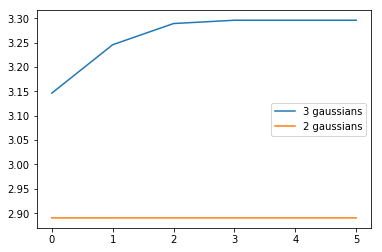

In [8]:
plt.plot(log_llh)
plt.plot(log_llh_2)
plt.legend(['3 gaussians', '2 gaussians'])
plt.show()

# The face database

In [9]:
X = scipy.io.loadmat('facedata.mat')
xf = {}
for i in range(X['facedata'].shape[0]):
    for j in range(X['facedata'].shape[1]):
        xf[i, j] = img_as_float(X['facedata'][i, j])

### T5. Euclidean distance

In [10]:
def euc_dis(a, b):
    return np.sum((a - b) ** 2) ** 0.5

In [11]:
#between xf[0,0] and xf[0,1]
print(euc_dis(xf[0,0], xf[0,1]))

10.037616294165492


In [12]:
#between xf[0,0] and xf[1,0]
print(euc_dis(xf[0,0], xf[1,0]))

8.173295099737281


### T6. Similarity matrix

In [13]:
def sim_matrix(train, test):
    sim_mat = np.zeros((len(train), len(test)))
    for i in range(len(train)):
        for j in range(len(test)):
            sim_mat[i, j] = euc_dis(train[i], test[j])
    return sim_mat

In [14]:
T = []
for i in range(X['facedata'].shape[0]):
    for j in range(3):
        T.append(xf[i, j])
T = np.array(T)

D = []
for i in range(X['facedata'].shape[0]):
    for j in range(3,10):
        D.append(xf[i, j])
D = np.array(D)

A = sim_matrix(T,D);

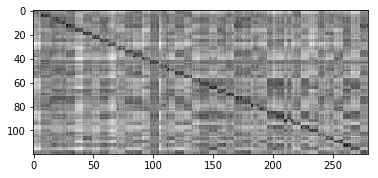

In [15]:
plt.imshow(A, cmap="gray")
plt.show()

### T8. A simple face verification system

In [16]:
def face_verify(sim_mat, t):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(280):
        for j in range(40):
            pred = min(sim_mat[j*3, i], sim_mat[j*3+1, i], sim_mat[j*3+2, i]) < t
            real = i//7 == j
            if real and pred:
                tp += 1
            elif not real and pred:
                fp += 1
            elif real and not pred:
                fn += 1
            elif not real and not pred:
                tn += 1
    return tp / (tp + fn), fp / (fp + tn)

In [17]:
tpr, fpr = face_verify(A, 10)
print("True positive rate", tpr)
print("False alarm rate", fpr)

True positive rate 0.9964285714285714
False alarm rate 0.4564102564102564


### T9. RoC curve & T10. EER (Equal Error Rate)

In [18]:
def roc(A):
    tprs = []
    fprs = []
    
    t_min = np.min(A)
    t_max = np.max(A)
    gap = (t_max - t_min) / 999
    
    eer_x1 = 0
    eer_y1 = 0
    eer_x2 = 0
    eer_y2 = 0
    
    x1 = 0
    y1 = 0
    x2 = 0
    y2 = 0
    
    for t in np.arange(t_min, t_max + gap, gap):
        tpr, fpr = face_verify(A, t)
        
        if tpr <= 1 - fpr:
            eer_x1 = fpr
            eer_y1 = tpr
            
        if eer_x2 == 0 and tpr >= 1 - fpr:
            eer_x2 = fpr
            eer_y2 = tpr
            
        if fpr <= 0.001:
            x1 = fpr
            y1 = tpr
            
        if x2 == 0 and fpr >= 0.001:
            x2 = fpr
            y2 = tpr
            
        tprs.append(tpr)
        fprs.append(fpr)
    
    eer = (eer_x1*eer_y2 - eer_x2*eer_y1 + eer_x2 - eer_x1) / (eer_y2 - eer_y1 + eer_x2 - eer_x1)
    rec_01p = y1 + (y2 - y1) * (0.001 - x1) / (x2 - x1)
    
    return fprs, tprs, eer, rec_01p

Min threshold: 1.7420153428787784
Max threshold: 17.541726165424688
EER: 0.08962406015037516
Reall rate at fpr=0.001: 0.5461428571428572


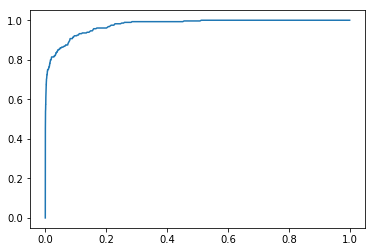

In [19]:
fprs, tprs, eer, rec_01p = roc(A)

print("Min threshold:", np.min(A))
print("Max threshold:", np.max(A))
print("EER:", eer)
print("Reall rate at fpr=0.001:", rec_01p)
plt.plot(fprs, tprs)
plt.show()

# Principle Component Analysis (PCA)

### T11. Compute mean vector

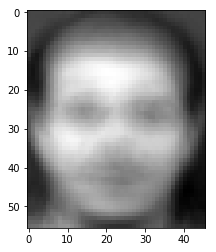

In [20]:
meanface = sum(T) / len(T)
plt.imshow(meanface, cmap='gray')
plt.show()

### T15. Eigenvectors and eigenvalues of the Gram matrix

In [21]:
X_hat = np.array([(x - meanface).reshape(56*46) for x in T])
evalue, evector = np.linalg.eigh(X_hat.dot(X_hat.T))
evalue = evalue[::-1]
evector = np.flip(evector, 1)

In [22]:
cnt_nonzero = 0
for i in evalue:
    if (i > 1e-9):
        cnt_nonzero += 1
print("Non-zero eigenvalues:", cnt_nonzero)

Non-zero eigenvalues: 119


### T16. Plot the eigenvalues

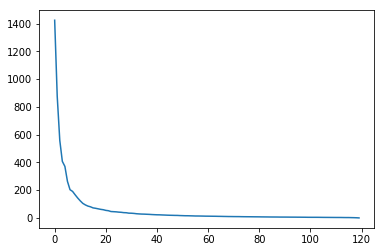

In [23]:
plt.plot(evalue)
plt.show()

In [24]:
all_var = sum(evalue)
acc = 0
for i in range(len(evalue)):
    if acc / all_var >= 0.95:
        print("95% variance: should keep", i, "eigenvectors")
        break
    acc += evalue[i]

95% variance: should keep 64 eigenvectors


### T17. Compute eigenfaces

In [25]:
V = -evector.T.dot(X_hat)
V = (V.T / np.linalg.norm(V.T, axis=0)).T

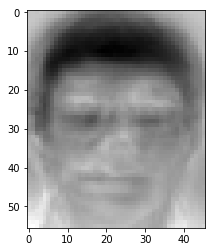

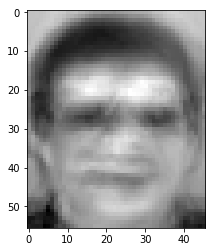

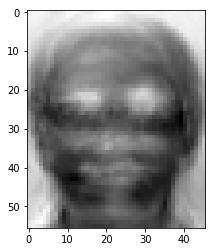

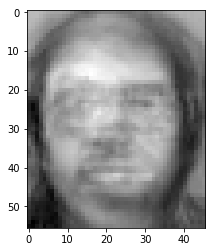

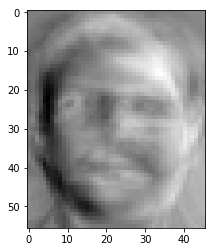

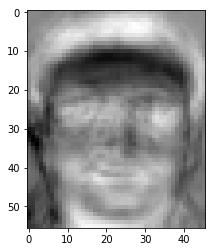

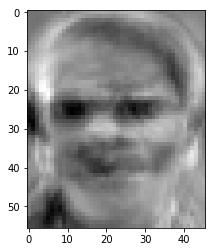

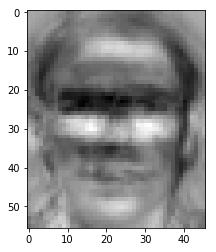

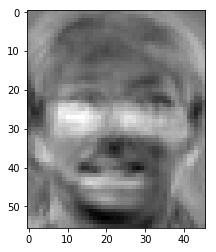

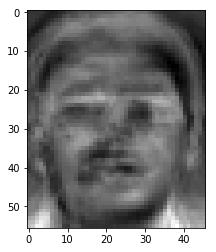

In [26]:
for i in range(10):
    plt.imshow(V[i].reshape(56, 46), cmap='gray')
    plt.show()

### T19. Find the projection values of all images

In [27]:
T_hat = np.array([(x - meanface).reshape(56*46) for x in T])
D_hat = np.array([(x - meanface).reshape(56*46) for x in D])

def project(k):
    T_proj = T_hat.dot(V[:k].T)
    D_proj = D_hat.dot(V[:k].T)
    
    return T_proj, D_proj

In [28]:
T_proj, D_proj = project(10)
A_proj = sim_matrix(T_proj, D_proj)
fprs_pca, tprs_pca, eer, rec_01p = roc(A_proj)

print("EER:", eer)
print("Reall rate at fpr=0.001:", rec_01p)

EER: 0.07857142857142424
Reall rate at fpr=0.001: 0.5175714285714286


### T20. Find the k that give best EER

In [29]:
best_eer = 1
best_k = 0
for k in range (5,15):
    T_proj, D_proj = project(k)
    A_proj = sim_matrix(T_proj, D_proj)
    fprs, tprs, eer, rec_01p = roc(A_proj)
    
    print("K:", k, ", EER:", eer)
    
    if eer < best_eer:
        best_eer = eer
        best_k = k

K: 5 , EER: 0.10714285714285599
K: 6 , EER: 0.09389880952381034
K: 7 , EER: 0.09285714285713971
K: 8 , EER: 0.08578296703296728
K: 9 , EER: 0.08070054945055112
K: 10 , EER: 0.07857142857142424
K: 11 , EER: 0.07836927223719792
K: 12 , EER: 0.08505830903790255
K: 13 , EER: 0.08225806451612805
K: 14 , EER: 0.0821428571428658


In [30]:
print("Best k:", best_k)
print("Best EER:", best_eer)

Best k: 11
Best EER: 0.07836927223719792


# (Optional) PCA reconstruction

### OT1 & OT2 Reconstruct & Calculate MSE

K: 1 , MSE: 0.018486954509692028


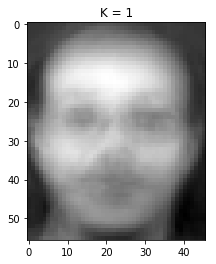

K: 2 , MSE: 0.016232644731309896


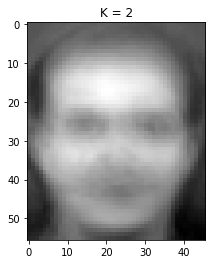

K: 3 , MSE: 0.010083926809950055


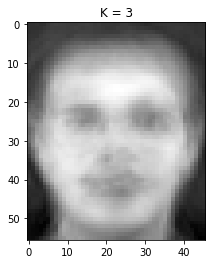

K: 4 , MSE: 0.010083926132523669


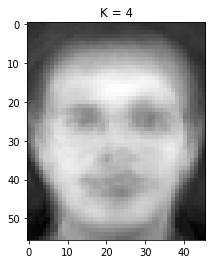

K: 5 , MSE: 0.010061224016363009


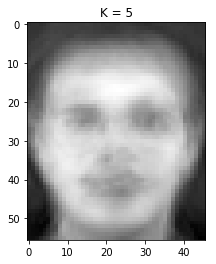

K: 6 , MSE: 0.009344143686155576


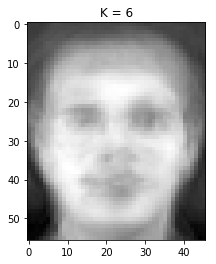

K: 7 , MSE: 0.008871378021262762


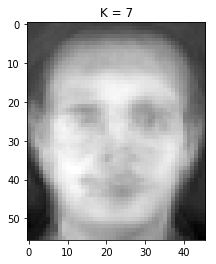

K: 8 , MSE: 0.008254991781399039


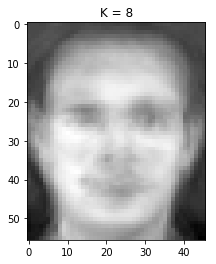

K: 9 , MSE: 0.0063989621684515646


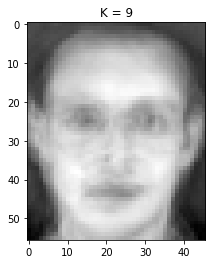

K: 10 , MSE: 0.006148335016488305


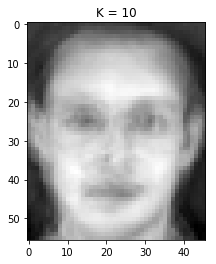

K: 119 , MSE: 9.228105290829232e-31


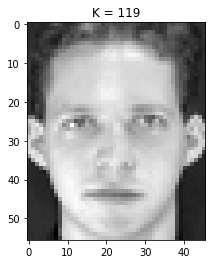

In [31]:
img = xf[0, 0]
x = []
y = []

for k in np.concatenate([np.arange(1,11), [119]]):
    rec_img = (img - meanface).reshape(56*46).dot(V[:k].T)
    rec_img = meanface + (rec_img.dot(V[:k])).reshape(56, 46)
    
    mse = np.sum((img - rec_img) ** 2) / np.size(img)
    
    x.append(k)
    y.append(mse)
    
    print("K:", k, ", MSE:", mse)
    plt.title("K = %d" % k)
    plt.imshow(rec_img, cmap='gray')
    plt.show()

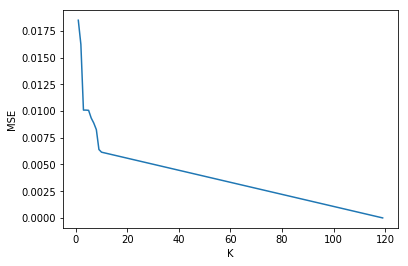

In [32]:
plt.plot(x, y)
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()

### T22. Find the LDA projection

In [47]:
T_proj, D_proj = project(80)
pca_mean = sum(T_proj) / 120

class_mean = []
for i in range(40):
    class_mean.append(np.sum([T_proj[3*i], T_proj[3*i+1], T_proj[3*i+2]], axis=0) / 3)
class_mean = np.array(class_mean)

In [48]:
Sb = sum([np.outer(class_mean[i] - pca_mean, class_mean[i] - pca_mean) for i in range(len(class_mean))])
Sw = sum([np.outer(T_proj[3*i+j] - class_mean[i], T_proj[3*i+j] - class_mean[i]) for i in range(40) for j in range(3)])

lda_matrix = np.linalg.inv(Sw).dot(Sb)

lda_evalue, lda_evector = np.linalg.eig(lda_matrix)
np.linalg.matrix_rank(Sw)

80

In [35]:
cnt_nonzero = 0
for i in lda_evalue:
    if (i > 1e-9):
        cnt_nonzero += 1
print("Non-zero eigenvalues:", cnt_nonzero)

Non-zero eigenvalues: 39


### T23. LDA projection

In [50]:
L = lda_evector.T.dot(V[:80])
L = (L.T / np.linalg.norm(L.T, axis=0)).T
L.shape

(80, 2576)

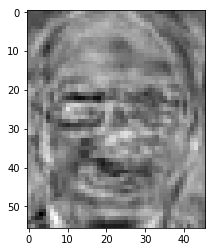

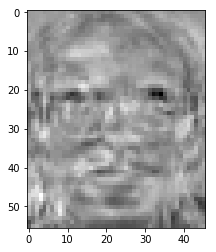

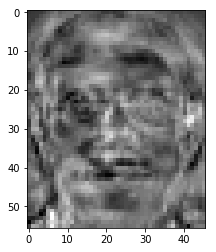

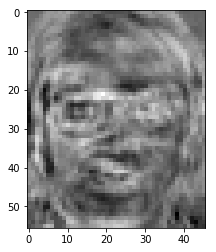

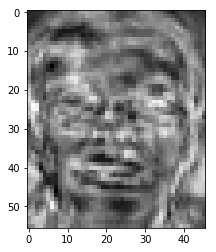

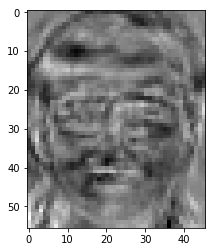

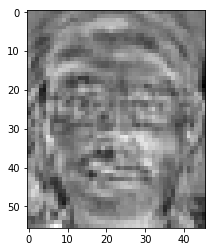

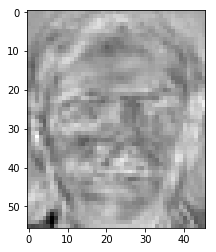

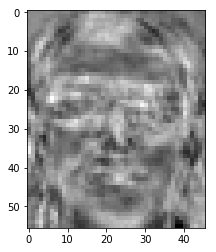

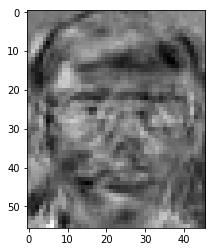

In [37]:
for i in range(10):
    plt.imshow(L[i].real.reshape(56, 46), cmap='gray')
    plt.show()

### T24. Calculate the fisherfaces projection of all images

In [38]:
def project_lda(k):
    T_proj = T_hat.dot(L.T)
    D_proj = D_hat.dot(L.T)
    
    return T_proj, D_proj

In [39]:
T_proj, D_proj = project_lda(10)
A_proj = sim_matrix(T_proj, D_proj)
fprs_lda, tprs_lda, eer, rec_01p = roc(A_proj)

print("EER:", eer)
print("Reall rate at fpr=0.001:", rec_01p)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


EER: 0.0785714285714228
Reall rate at fpr=0.001: 0.6068571428571428


### T25. Plot the RoC of all three experiments

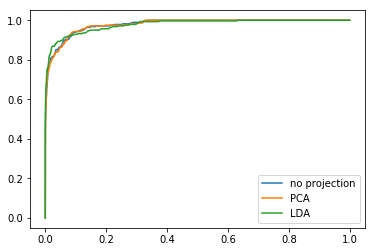

In [40]:
plt.plot(fprs, tprs)
plt.plot(fprs_pca, tprs_pca)
plt.plot(fprs_lda, tprs_lda)
plt.legend(['no projection', 'PCA', 'LDA'])
plt.show()

### OT4. Plot the first two LDA dimensions of the test images & PCA projection

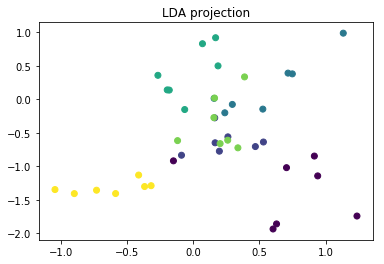

In [41]:
D_lda = D_hat[:42].dot(L[:2].real.T)
colors = np.concatenate([[i]*7 for i in range(6)])

plt.title("LDA projection")
plt.scatter(D_lda[:, 0], D_lda[:, 1], c=colors)
plt.show()

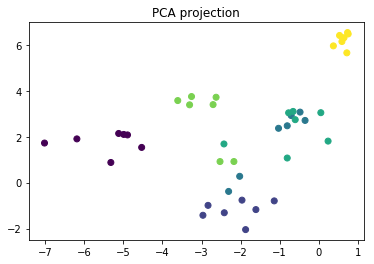

In [42]:
D_pca = D_hat[:42].dot(V[:2].real.T)
colors = np.concatenate([[i]*7 for i in range(6)])

plt.title("PCA projection")
plt.scatter(D_pca[:, 0], D_pca[:, 1], c=colors)
plt.show()